In [1]:
import json 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
with open("../protein_properties/proteins.json") as f:
    data = f.read()
    proteins = json.loads(data)
len(proteins)

20427

In [5]:
# Read from protein_drugbank.json
with open("../drugbank/protein_drugbank.json", "r") as f:
    drugs = json.load(f)

druggable_prots = []
for k, v in drugs.items():
    for drug, info in v.items():
        if("approved" in info[1]):
            druggable_prots.append(k)
            break 

In [6]:
len(druggable_prots)

2652

#### Molar Extinction Coefficient

In [12]:
mec_druggable_280 = []
mec_druggable_205 = []
mec_non_druggable_280 = []
mec_non_druggable_205 = []

for prot, info in proteins.items():
    if prot in druggable_prots:
        mec_druggable_280.append(info['Molar Extinction Coefficient'][0])
        mec_druggable_205.append(info['Molar Extinction Coefficient'][1])
    else:
        mec_non_druggable_280.append(info['Molar Extinction Coefficient'][0])
        mec_non_druggable_205.append(info['Molar Extinction Coefficient'][1])

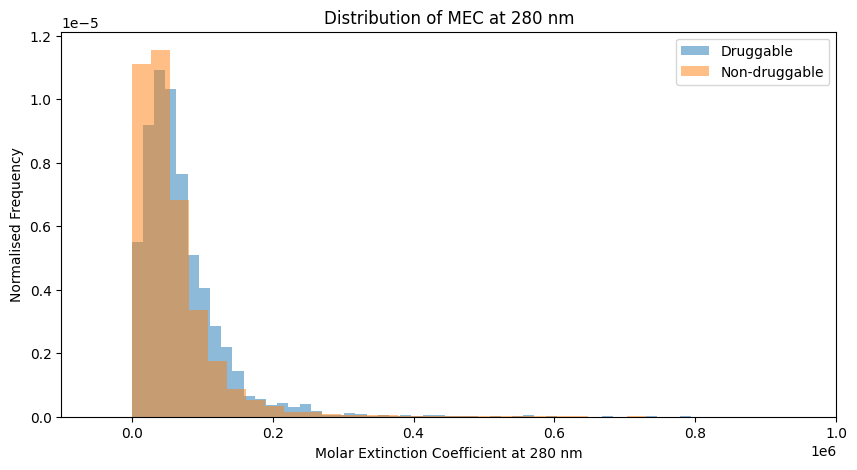

In [37]:
# Plotting the distribution of MEC at 280 nm by putting normalised frequency on y-axis

plt.figure(figsize=(10,5))
plt.hist(mec_druggable_280, bins=50, alpha=0.5, label='Druggable', density=True)
plt.hist(mec_non_druggable_280, bins=150, alpha=0.5, label='Non-druggable', density=True)

plt.xlabel('Molar Extinction Coefficient at 280 nm')
plt.ylabel('Normalised Frequency')
plt.title('Distribution of MEC at 280 nm')
plt.legend(loc='upper right')
plt.xlim(-100000, 1000000)
plt.savefig('images/mec_280.png')
plt.show()


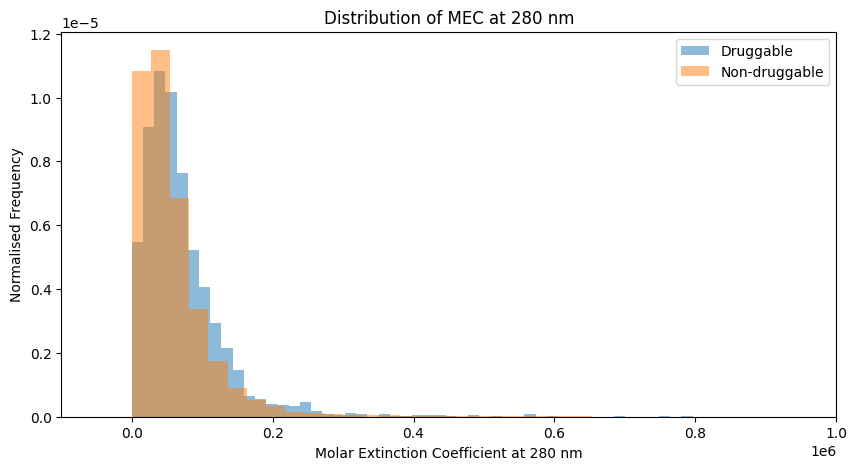

In [35]:
# Plotting the distribution of MEC at 205 nm by putting normalised frequency on y-axis

plt.figure(figsize=(10,5))
plt.hist(mec_druggable_205, bins=50, alpha=0.5, label='Druggable', density=True)
plt.hist(mec_non_druggable_205, bins=150, alpha=0.5, label='Non-druggable', density=True)

plt.xlabel('Molar Extinction Coefficient at 205 nm')
plt.ylabel('Normalised Frequency')
plt.title('Distribution of MEC at 205 nm')
plt.legend(loc='upper right')
plt.xlim(-100000, 1000000)
plt.savefig('images/mec_205.png')
plt.show()

Clearly, the distribution for both overlap, saying that MEC[0] is a poor metric to differentiate the two groups

#### GRAVY values

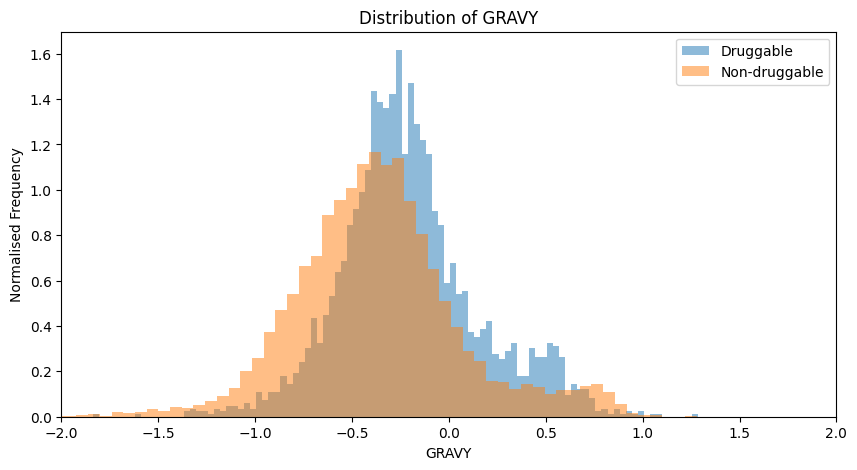

In [38]:
gravy_druggable = []
gravy_non_druggable = []

for prot, info in proteins.items():
    if prot in druggable_prots:
        gravy_druggable.append(info['GRAVY'])
    else:
        gravy_non_druggable.append(info['GRAVY'])

# Plotting the distribution of GRAVY by putting normalised frequency on y-axis

plt.figure(figsize=(10,5))
plt.hist(gravy_druggable, bins=100, alpha=0.5, label='Druggable', density=True)
plt.hist(gravy_non_druggable, bins=100, alpha=0.5, label='Non-druggable', density=True)

plt.xlabel('GRAVY')
plt.ylabel('Normalised Frequency')
plt.title('Distribution of GRAVY')
plt.legend(loc='upper right')
plt.xlim(-2, 2)
plt.savefig('images/gravy.png')
plt.show()

#### Isoelectric Point

(0.0, 14.0)

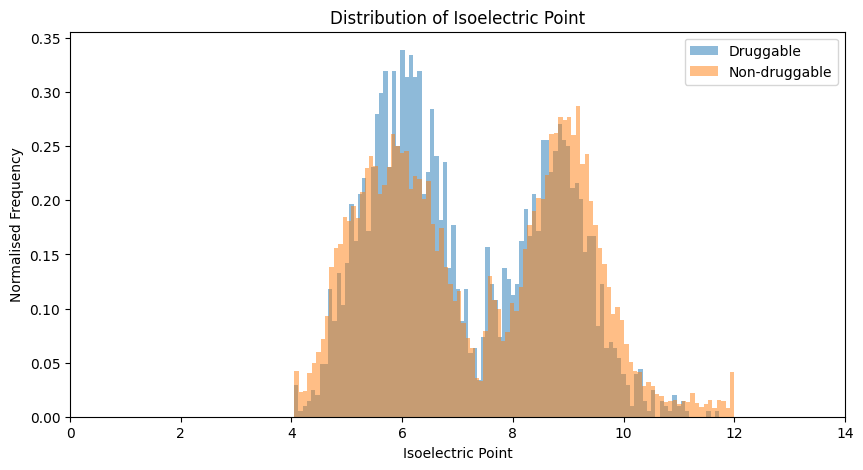

In [40]:
ip_druggable = []
ip_non_druggable = []
for prot, info in proteins.items():
    if prot in druggable_prots:
        ip_druggable.append(info['Isoelectric Point'])
    else:
        ip_non_druggable.append(info['Isoelectric Point'])

# Plotting the distribution of Isoelectric Point by putting normalised frequency on y-axis
plt.figure(figsize=(10,5))
plt.hist(ip_druggable, bins=100, alpha=0.5, label='Druggable', density=True)
plt.hist(ip_non_druggable, bins=100, alpha=0.5, label='Non-druggable', density=True)

plt.xlabel('Isoelectric Point')
plt.ylabel('Normalised Frequency')
plt.title('Distribution of Isoelectric Point')
plt.legend(loc='upper right')
plt.savefig('images/isoelectric_pt.png')
plt.xlim(0, 14)

#### Instability index

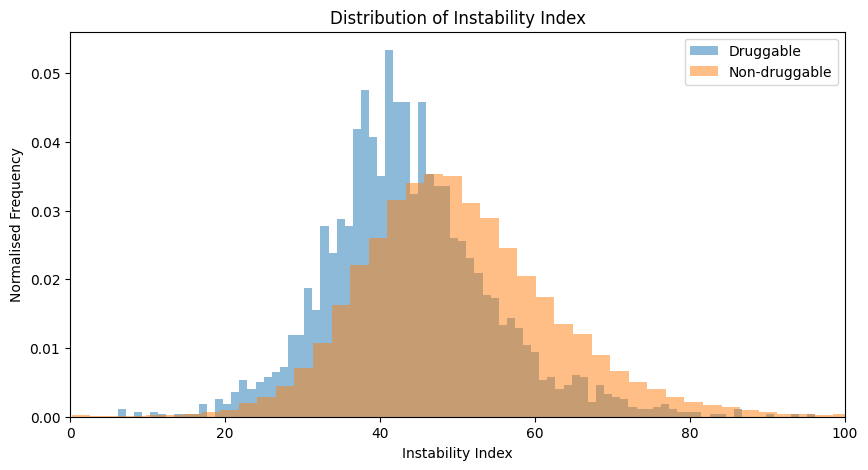

In [43]:
instability_druggable = []
instability_non_druggable = []
for prot, info in proteins.items():
    if prot in druggable_prots:
        instability_druggable.append(info['Instability Index'])
    else:
        instability_non_druggable.append(info['Instability Index'])

# Plotting the distribution of Instability Index by putting normalised frequency on y-axis
plt.figure(figsize=(10,5))
plt.hist(instability_druggable, bins=100, alpha=0.5, label='Druggable', density=True)
plt.hist(instability_non_druggable, bins=100, alpha=0.5, label='Non-druggable', density=True)

plt.xlabel('Instability Index')
plt.ylabel('Normalised Frequency')
plt.title('Distribution of Instability Index')
plt.legend(loc='upper right')
plt.xlim(0, 100)
plt.savefig('images/instability_index.png')
plt.show()

#### Aromaticity

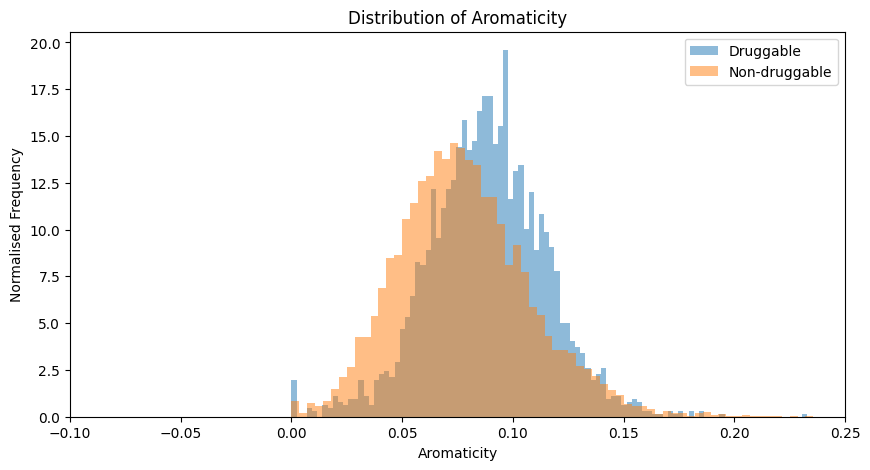

In [47]:
aromaticity_druggable = []
aromaticity_non_druggable = []
for prot, info in proteins.items():
    if prot in druggable_prots:
        aromaticity_druggable.append(info['Aromaticity'])
    else:
        aromaticity_non_druggable.append(info['Aromaticity'])

# Plotting the distribution of Aromaticity by putting normalised frequency on y-axis
plt.figure(figsize=(10,5))
plt.hist(aromaticity_druggable, bins=100, alpha=0.5, label='Druggable', density=True)
plt.hist(aromaticity_non_druggable, bins=100, alpha=0.5, label='Non-druggable', density=True)

plt.xlabel('Aromaticity')
plt.ylabel('Normalised Frequency')
plt.title('Distribution of Aromaticity')
plt.legend(loc='upper right')
plt.xlim(-0.1,0.25)
plt.savefig('images/aromaticity.png')
plt.show()